### Fitting linear models:
Estimation of the linear functions that best describe the execution time of each method on the data of alegrand.



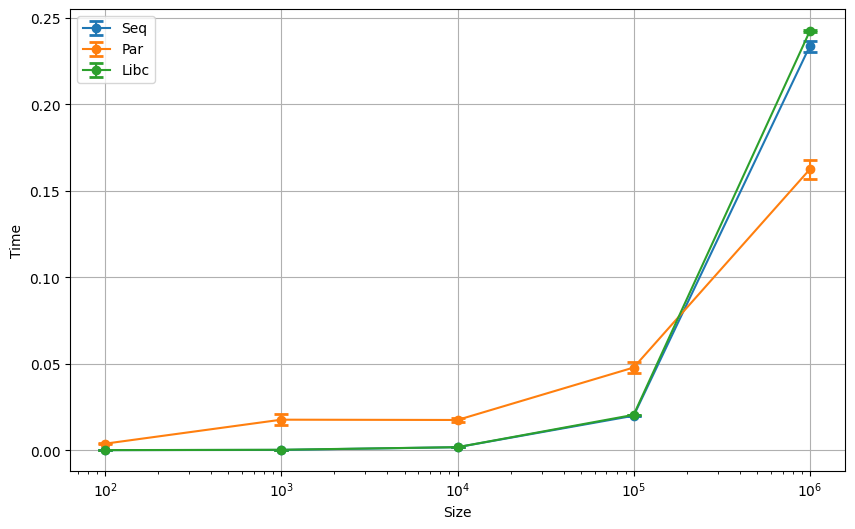

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#plotting to check if the data looks OK
df = pd.read_csv('data/alegrand.csv')
plt.figure(figsize=(10, 6))
grouped = df.groupby('Size')
for col in ['Seq', 'Par', 'Libc']:
    means = grouped[col].mean()
    stds = grouped[col].std()
    counts = grouped[col].count()
    # Calculate 95% confidence interval using t-distribution
    # For n=30, t-value is 2.045 (for 95% confidence, 29 degrees of freedom)
    t_value = 2.045
    margin_of_error = t_value * (stds / (counts ** 0.5))
    plt.errorbar(means.index, means, yerr=margin_of_error, fmt='o-', capsize=5, capthick=2, label=col)
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

Lets try to estimate the functions for all three algorithms
Since we know quicksort has an average time complexity of O(n log n), we know a linear model
won't be the best fit, but we can still try

We will estimate the functions using least squares fitting

#Libc Algorithm

In [5]:
df = pd.read_csv('data/alegrand.csv')
df.sort_values('Size', inplace=True)
y_mean = df['Libc'].mean()
x_mean = df['Size'].mean()
print(f"Sample mean for Libc: {y_mean}")

slope = 0
for i in range(0, len(df)):
    slope += (df['Size'][i] - x_mean) * (df['Libc'][i] - y_mean)
slope /= sum((df['Size'][i] - x_mean) ** 2 for i in range(0, len(df)))
print(f"Slope for Libc: {slope}")

intercept = y_mean - slope * x_mean
print(f"Intercept for Libc: {intercept}")
print(f"Libc method linear estimation: Y = {intercept} + {slope}*x + E")

# Predictions
predictions = intercept + slope * df['Size']

r_squared = 1 - sum((df['Libc'] - predictions) ** 2) / sum((df['Libc'] - y_mean) ** 2)
print(f"R-squared for Libc linear model: {r_squared}")



Sample mean for Libc: 0.05292288
Slope for Libc: 2.4308800621025084e-07
Intercept for Libc: -0.001096136740041942
Libc method linear estimation: Y = -0.001096136740041942 + 2.4308800621025084e-07*x + E
R-squared for Libc linear model: 0.9997622220888065


Result: R^2 = 0.99. This menas that the linear model is a good fit for the data, and it explains 99% of the variance in the data. However, we know that quicksort has an average time complexity of O(n log n), so this just probably means that the data we have is not large enough to see the non-linear trend, and that the linear model is just a good approximation for the data we have.

#Seq Algorithm

In [6]:
df = pd.read_csv('data/alegrand.csv')
df.sort_values('Size', inplace=True)
y_mean = df['Seq'].mean()
x_mean = df['Size'].mean()
print(f"Sample mean for Seq: {y_mean}")

slope = 0
for i in range(0, len(df)):
    slope += (df['Size'][i] - x_mean) * (df['Seq'][i] - y_mean)
slope /= sum((df['Size'][i] - x_mean) ** 2 for i in range(0, len(df)))
print(f"Slope for Seq: {slope}")

intercept = y_mean - slope * x_mean
print(f"Intercept for Seq: {intercept}")
print(f"Seq method linear estimation: Y = {intercept} + {slope}*x + E")

# Predictions
predictions = intercept + slope * df['Size']

r_squared = 1 - sum((df['Seq'] - predictions) ** 2) / sum((df['Seq'] - y_mean) ** 2)
print(f"R-squared for Seq linear model: {r_squared}")



Sample mean for Seq: 0.05105756
Slope for Seq: 2.3433299304691158e-07
Intercept for Seq: -0.0010159177148846912
Seq method linear estimation: Y = -0.0010159177148846912 + 2.3433299304691158e-07*x + E
R-squared for Seq linear model: 0.9995646752243311


Result: R^2 = 0.99. Similar conclusion can be drawn. This is expected as we have previously suspected that the Seq and Libc versions are very similar in implementation and performance.

#Parallel Algorithm - the interesting part

In [7]:
df = pd.read_csv('data/alegrand.csv')
df.sort_values('Size', inplace=True)
y_mean = df['Par'].mean()
x_mean = df['Size'].mean()
print(f"Sample mean for Par: {y_mean}")

slope = 0
for i in range(0, len(df)):
    slope += (df['Size'][i] - x_mean) * (df['Par'][i] - y_mean)
slope /= sum((df['Size'][i] - x_mean) ** 2 for i in range(0, len(df)))
print(f"Slope for Par: {slope}")

intercept = y_mean - slope * x_mean
print(f"Intercept for Par: {intercept}")
print(f"Par method linear estimation: Y = {intercept} + {slope}*x + E")

# Predictions
predictions = intercept + slope * df['Size']

r_squared = 1 - sum((df['Par'] - predictions) ** 2) / sum((df['Par'] - y_mean) ** 2)
print(f"R-squared for Par linear model: {r_squared}")



Sample mean for Par: 0.04978416
Slope for Par: 1.4676259965429844e-07
Intercept for Par: 0.017170575104821804
Par method linear estimation: Y = 0.017170575104821804 + 1.4676259965429844e-07*x + E
R-squared for Par linear model: 0.9713076069704971


R^2 is starting to deteriorate. 
We also strive for simplicity, so we will execute the ANOVA test to see if the linear model is significantly better than a more complex model, such as a polynomial model.
We will use np and scipy to perform the ANOVA test and compare the linear model with a polynomial model of degree 2 or 3, to see if the more complex model provides a significantly better fit to the data.


  Seq - Polynomial Regression ANOVA
Degree   R²           Adj R²       F-stat       p-value      SS_res         
1        0.99956468   0.99954575   52811.1167   0.000000     0.0000912585   
2        0.99976463   0.99974323   46723.4131   0.000000     0.0000493419   
3        0.99976550   0.99973200   29843.8870   0.000000     0.0000491587   
4        0.99976551   0.99971862   21318.3178   0.000000     0.0000491559   

Sequential F-test (comparing degree k vs k-1):
Comparison           F-stat       p-value      Significant?
deg 1 vs 2          18.6893      0.000274     Yes
deg 2 vs 3          0.0782       0.782431     No
deg 3 vs 4          0.0012       0.972963     No

** Best polynomial degree for Seq: 2 **

  Par - Polynomial Regression ANOVA
Degree   R²           Adj R²       F-stat       p-value      SS_res         
1        0.97130761   0.97006011   778.6062     0.000000     0.0024279783   
2        0.99141640   0.99063607   1270.5129    0.000000     0.0007263530   
3        0.99

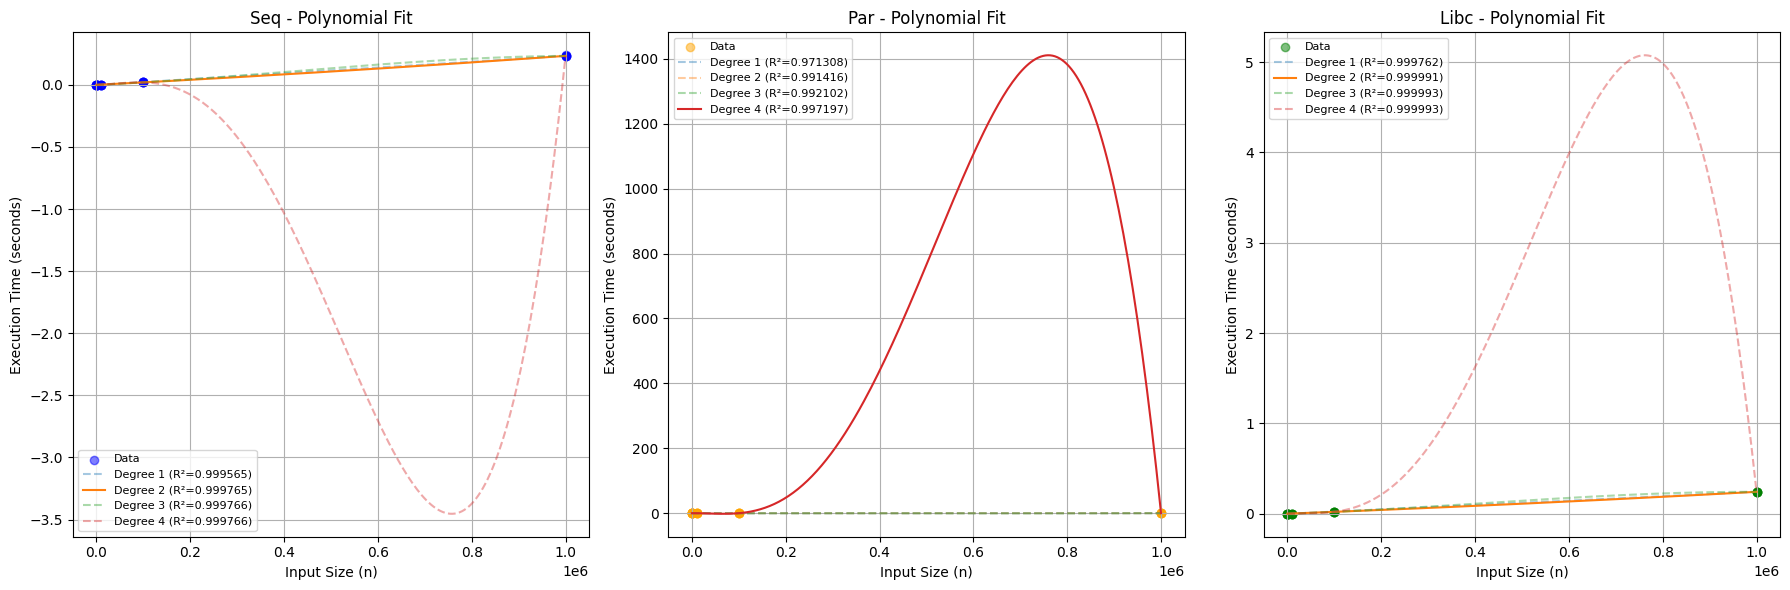

In [9]:
import numpy as np
from scipy import stats

# Use the alegrand data already loaded
df = pd.read_csv('data/alegrand.csv')
df.columns = df.columns.str.strip()
df.sort_values('Size', inplace=True)
df.reset_index(drop=True, inplace=True)

# Define polynomial degrees to test
degrees = [1, 2, 3, 4]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['blue', 'orange', 'green']
for idx, (col, color) in enumerate(zip(['Seq', 'Par', 'Libc'], colors)):
    ax = axes[idx]
    X = df['Size'].values
    y = df[col].values
    
    ax.scatter(X, y, color=color, alpha=0.5, label='Data')
    
    # Fit polynomial models and compute ANOVA
    models = {}
    for deg in degrees:
        coeffs = np.polyfit(X, y, deg)
        poly = np.poly1d(coeffs)
        y_pred = poly(X)
        
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot
        adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - deg - 1)
        
        # Parameters for ANOVA: p = deg + 1 (number of parameters)
        df_model = deg
        df_resid = len(y) - deg - 1
        ss_reg = ss_tot - ss_res
        ms_reg = ss_reg / df_model if df_model > 0 else 0
        ms_res = ss_res / df_resid if df_resid > 0 else float('inf')
        f_stat = ms_reg / ms_res if ms_res > 0 else float('inf')
        p_value = 1 - stats.f.cdf(f_stat, df_model, df_resid) if df_resid > 0 else float('nan')
        
        models[deg] = {
            'coeffs': coeffs, 'poly': poly, 'y_pred': y_pred,
            'r2': r2, 'adj_r2': adj_r2, 'ss_res': ss_res, 'ss_reg': ss_reg,
            'f_stat': f_stat, 'p_value': p_value, 'df_model': df_model, 'df_resid': df_resid
        }
    
    # Sequential F-test (ANOVA) comparing nested models
    print(f"\n{'='*60}")
    print(f"  {col} - Polynomial Regression ANOVA")
    print(f"{'='*60}")
    print(f"{'Degree':<8} {'R²':<12} {'Adj R²':<12} {'F-stat':<12} {'p-value':<12} {'SS_res':<15}")
    for deg in degrees:
        m = models[deg]
        print(f"{deg:<8} {m['r2']:<12.8f} {m['adj_r2']:<12.8f} {m['f_stat']:<12.4f} {m['p_value']:<12.6f} {m['ss_res']:<15.10f}")
    
    # Sequential F-test: compare degree k vs degree k-1
    print(f"\nSequential F-test (comparing degree k vs k-1):")
    print(f"{'Comparison':<20} {'F-stat':<12} {'p-value':<12} {'Significant?':<12}")
    best_degree = 1
    for deg in degrees[1:]:
        ss_res_reduced = models[deg - 1]['ss_res']
        ss_res_full = models[deg]['ss_res']
        df_extra = 1  # one extra parameter
        df_resid_full = models[deg]['df_resid']
        
        f_seq = ((ss_res_reduced - ss_res_full) / df_extra) / (ss_res_full / df_resid_full) if df_resid_full > 0 else float('inf')
        p_seq = 1 - stats.f.cdf(f_seq, df_extra, df_resid_full) if df_resid_full > 0 else float('nan')
        significant = "Yes" if p_seq < 0.05 else "No"
        print(f"deg {deg-1} vs {deg:<10} {f_seq:<12.4f} {p_seq:<12.6f} {significant}")
        
        if p_seq < 0.05:
            best_degree = deg
    
    print(f"\n** Best polynomial degree for {col}: {best_degree} **")
    
    # Plot best fit
    x_plot = np.linspace(X.min(), X.max(), 200)
    for deg in degrees:
        y_plot = models[deg]['poly'](x_plot)
        linestyle = '-' if deg == best_degree else '--'
        alpha = 1.0 if deg == best_degree else 0.4
        ax.plot(x_plot, y_plot, linestyle=linestyle, alpha=alpha,
                label=f'Degree {deg} (R²={models[deg]["r2"]:.6f})')
    
    ax.set_xlabel('Input Size (n)')
    ax.set_ylabel('Execution Time (seconds)')
    ax.set_title(f'{col} - Polynomial Fit')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Conclusion:
It is a bit weird to draw conclusions from the R^2 values, since we know that the time complexity of quicksort is O(n log n), which is not linear, but rather a non-linear function. However, it can still be useful to see how well the linear model fits the data, as it can give us an idea of how much of the variance in the data is explained by the linear model. In this case, it seems that the linear model explains a large portion of the variance in the data for the Seq and Libc versions, but not as much for the Parallel version, which suggests that there are other factors influencing the execution time that are not captured by the linear model for the Parallel version.

